<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

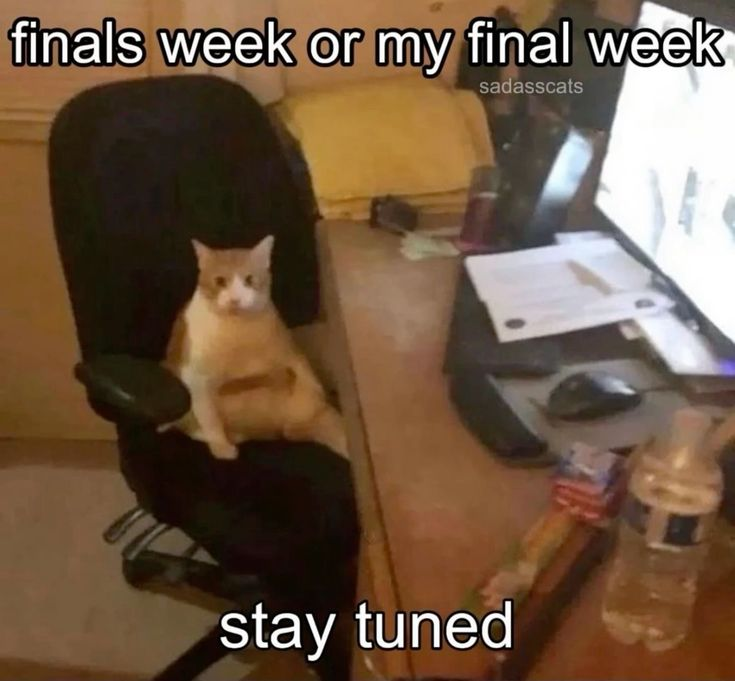

## Введение в рекуррентные нейронные сети

Рекуррентные нейронные сети (РНС) работают немного иначе, чем обычные нейронные сети. В нейронной сети информация течет в одном направлении от входа к выходу. Однако в RNN информация возвращается в систему после каждого шага. Подумайте об этом как о чтении предложения: когда вы пытаетесь предсказать следующее слово, вам нужно не только смотреть на текущее слово, но и помнить слова, которые были раньше, чтобы сделать точное предположение.

RNN позволяют сети «запоминать» прошлую информацию, передавая выходные данные с одного шага на следующий. Это помогает сети понимать контекст того, что уже произошло, и делать более точные прогнозы на основе этого. Например, при прогнозировании следующего слова в предложении RNN использует предыдущие слова, чтобы решить, какое слово, скорее всего, будет следующим.

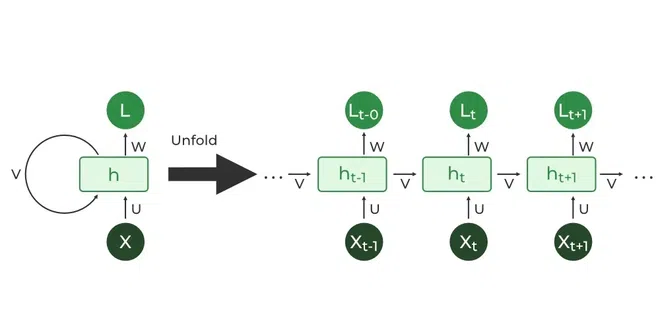

На этом рисунке показана базовая архитектура RNN и механизм петли обратной связи, в котором выходные данные передаются обратно в качестве входных данных для следующего временного шага.

### Отличие от FNN
Нейронные сети с прямой связью (FNN) обрабатывают данные в одном направлении от входа к выходу без сохранения информации с предыдущих входов. Это делает их подходящими для задач с независимыми входными данными, таких как классификация изображений. Однако FNN испытывают трудности с последовательными данными, поскольку им не хватает памяти.

Рекуррентные нейронные сети (РНС) решают эту проблему путем включения циклов, которые позволяют возвращать информацию из предыдущих этапов обратно в сеть. Эта обратная связь позволяет RNN запоминать предыдущие входные данные, что делает их идеальными для задач, где важен контекст.

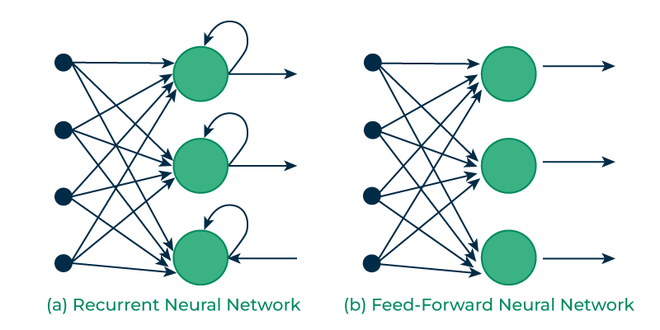

### Ключевые компоненты РНС  

1. **Рекуррентные нейроны**  
Основной единицей обработки в RNN является рекуррентная единица. Рекуррентные единицы содержат скрытое состояние, в котором сохраняется информация о предыдущих входах в последовательности. Рекуррентные устройства могут «запоминать» информацию из предыдущих шагов, возвращая их скрытое состояние, что позволяет им фиксировать зависимости во времени.

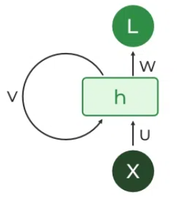

2. **RNN Unfolding**  
Разворачивание РНС — это процесс расширения повторяющейся структуры с течением времени. Во время развертывания каждый шаг последовательности представлен в виде отдельного слоя в ряду, иллюстрирующего, как информация проходит через каждый временной шаг.

Это позволяет использовать **обратное распространение во времени** (BPTT), процесс обучения, в котором ошибки распространяются по всем временным шагам для корректировки весов сети, расширяя возможности RNN по изучению зависимостей в последовательных данных.

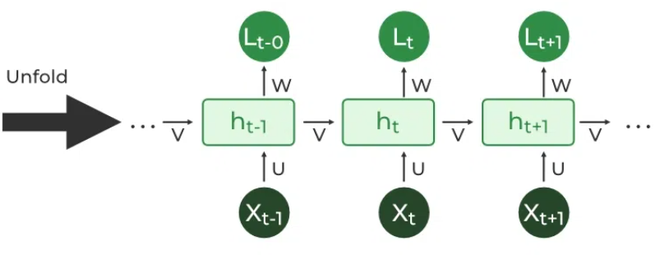

### Back Propagation through time – RNN (Обратное распространение во времени)

Для обучения таких сетей мы используем старое доброе обратное распространение, но с небольшой изюминкой. Мы не обучаем систему самостоятельно в определенное время "t". Мы тренируем его в определенное время «t», а также все, что произошло до времени «t», например, t-1, t-2, t-3. Рассмотрим следующее представление RNN:

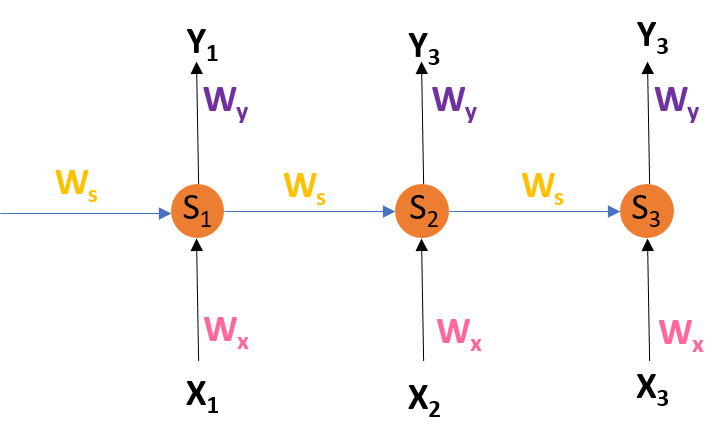

S1, S2, S3 — скрытые состояния или единицы памяти в момент времени t1, t2, t3 соответственно, а Ws — связанная с ним весовая матрица. X1, X2, X3 — входы в момент времени t1, t2, t3 соответственно, а Wx — связанная с ним матрица весов. Y1, Y2, Y3 — выходы в момент времени t1, t2, t3 соответственно, а Wy — связанная с ним весовая матрица. Для любого времени t, у нас есть следующие два уравнения:

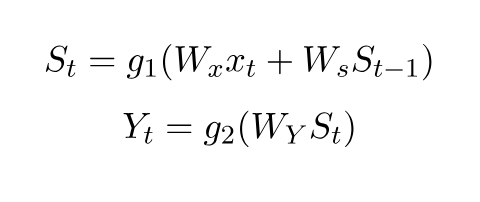

где G1 и G2 — функции активации. Теперь выполним обратное распространение в момент времени t = 3. Пусть функция error будет следующей:

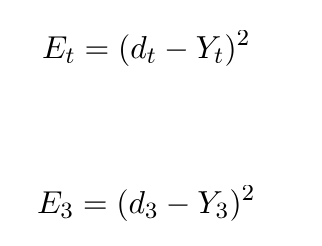

Здесь мы используем квадратичную ошибку, где d3 — желаемый выход в момент времени t = 3. Чтобы выполнить обратное распространение, нам необходимо настроить веса, связанные с входами, блоками памяти и выходами.  
**Регулировка Wy** Для лучшего понимания рассмотрим следующее представление:

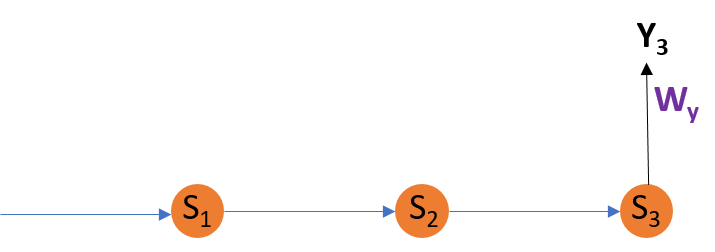

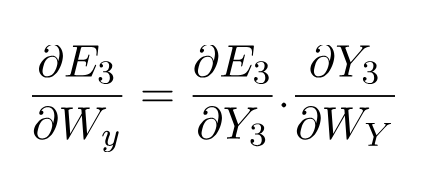

Пояснение: E3 является функцией Y3. Следовательно, мы дифференцируем E3 с Y3. Y3 является функцией WY. Следовательно, мы дифференцируем Y3 w.r.t WY.  
**Регулировка Ws** Для лучшего понимания рассмотрим следующее представление:

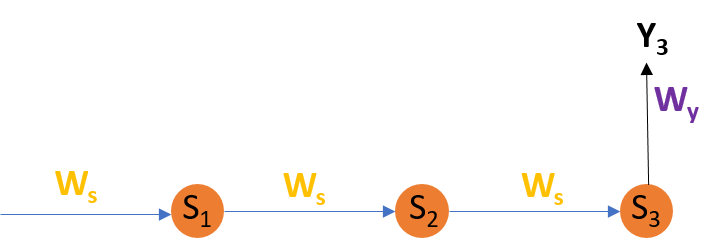

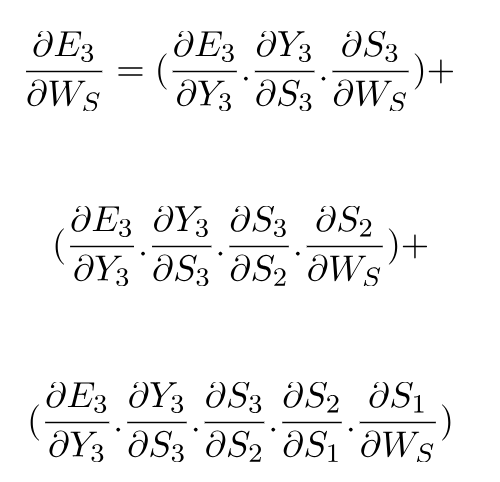

Пояснение: E3 является функцией Y3. Следовательно, мы дифференцируем E3 с Y3. Y3 является функцией S3. Следовательно, мы дифференцируем Y3 с S3. S3 является функцией WS. Следовательно, мы дифференцируем S3 w.r.t WS. Но мы не можем останавливаться на этом; Мы также должны учитывать предыдущие временные шаги. Таким образом, мы дифференцируем (частично) функцию Error относительно единиц памяти S2, а также S1 с учетом матрицы весов WS. Мы должны иметь в виду, что единица памяти, скажем, St является функцией его предыдущего блока памяти SТ-1. Следовательно, мы дифференцируем S3 с S2 и S2 с S1. В общем виде мы можем выразить эту формулу следующим образом:

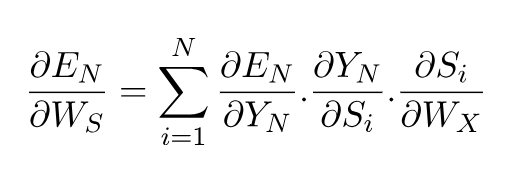

**Ограничения**: Этот метод обратного распространения во времени (BPTT) может быть использован до ограниченного количества временных шагов, таких как 8 или 10. Если мы продолжим обратное распространение, градиент станет слишком маленьким. Эта задача называется проблемой **«Исчезающий градиент»**.

Проблема в том, что вклад информации со временем уменьшается в геометрической прогрессии. Таким образом, если количество временных шагов равно > 10 (допустим), эта информация будет фактически отброшена.

Выходя за рамки RNN: Одним из известных решений этой проблемы является использование так называемых клеток с длинной кратковременной памятью (LSTM) вместо традиционных ячеек RNN. Но здесь может возникнуть еще одна проблема, называемая проблемой взрывающегося градиента, когда градиент становится неконтролируемо большим. Решение: Можно использовать популярный метод, называемый обрезкой градиента, когда на каждом временном шаге мы можем проверить, > ли градиент порогового значения. Если да, то нормализуйте его.


### Обратное распространение с помощью TensorFlow

Обратное распространение ошибки — это алгоритм, который помогает нейронным сетям обучаться, уменьшая ошибку между прогнозируемыми и фактическими результатами. Он корректирует веса и смещения модели на основе вычисленной ошибки. Он работает в два этапа:

- **Проход прямой связи**: входные данные перемещаются из входного слоя в выходной, проходя через скрытые слои. Каждый слой выполняет вычисления и применяет функции активации.

- **Обратный проход**: модель вычисляет, насколько каждый вес вносит вклад в ошибку, и обновляет веса, чтобы свести к минимуму потери. Этот процесс продолжается до тех пор, пока модель не выполнит точный прогноз


TensorFlow — одна из самых популярных библиотек глубокого обучения, которая помогает в эффективном обучении глубоких нейронных сетей. Теперь давайте подробно рассмотрим, как работает обратное распространение в TensorFlow.

TensorFlow автоматически вычисляет градиенты с помощью автоматического дифференцирования. Когда вы определяете нейронную сеть, TensorFlow создает вычислительный граф для отслеживания всех операций и градиентов. Затем он обновляет параметры модели с помощью оптимизаторов, таких как SGD, Adam и Adagrad.



In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


На этом шаге мы определяем модель с помощью Keras.
Модель состоит из двух слоев:

Плотный слой: скрытый слой с функцией активации ReLU и формой ввода, которая соответствует количеству признаков в обучающих данных.
Выходной слой: Выходной слой имеет три нейрона и использует функцию активации softmax для создания вероятностей классов.

In [4]:
hidden_layer_size = 32
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for Iris dataset
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

Модели требуется функция потерь для измерения того, насколько прогнозы удалены от фактических меток, и оптимизатор для обновления весовых коэффициентов.

In [5]:
learning_rate = 0.01
epochs = 1000

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate)

- **Разреженная категориальная кроссэнтропия**: это функция потерь, используемая в задачах классификации, где цель и метки являются целыми числами. Он вычисляет потери перекрестной энтропии между прогнозируемыми вероятностями классов и истинными метками классов, автоматически преобразуя целочисленные метки в векторы с одним горячим кодированием.

- **Стохастический градиентный спуск (SGD)**: это алгоритм оптимизации, используемый для обучения моделей. Он обновляет параметры модели с помощью небольших, случайно отобранных подмножеств обучающих данных, что вносит случайность и помогает модели быстрее сходиться к решению и потенциально избегать локальных минимумов.

**Реализация Backpropagation**  

Теперь давайте обучим модель с помощью обратного распространения. Контекст GradientTape записывает прямой проход и автоматически вычисляет уклоны во время обратного прохода.

- Контекст автоматически отслеживает все математические операции, применяемые к тензорам.GradientTape()

- Метки преобразуются в тензоры с помощью для обеспечения совместимости с функцией потерь.dtype=tf.int32

- Логиты — это необработанные прогнозы модели перед применением активации softmax.

- loss_value рассчитывается с помощью функции потерь.

- Метод рассчитывает градиенты потерь относительно параметров модели.tape.gradient()

- Метод обновляет веса с помощью оптимизатора.apply_gradients()

- Модель выводит значение потерь каждые 100 эпох для отслеживания процесса обучения.

In [6]:
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        logits = model(X_train)
        loss_value = loss_fn(y_train, logits)

    grads = tape.gradient(loss_value, model.trainable_variables)

    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss_value.numpy()}")


Epoch 100/1000, Loss: 0.5055842995643616
Epoch 200/1000, Loss: 0.4039822220802307
Epoch 300/1000, Loss: 0.34213992953300476
Epoch 400/1000, Loss: 0.29557397961616516
Epoch 500/1000, Loss: 0.2586396038532257
Epoch 600/1000, Loss: 0.22907014191150665
Epoch 700/1000, Loss: 0.2053208202123642
Epoch 800/1000, Loss: 0.186172217130661
Epoch 900/1000, Loss: 0.17063672840595245
Epoch 1000/1000, Loss: 0.15793412923812866


### Рекуррентная архитектура нейронных сетей  

RNN имеют сходство в структурах ввода и вывода с другими архитектурами глубокого обучения, но значительно различаются по тому, как информация передается от входа к выходу. В отличие от традиционных глубоких нейронных сетей, где каждый плотный слой имеет различные матрицы весов, RNN используют общие весовые коэффициенты на разных временных шагах, что позволяет им запоминать информацию по последовательностям.

В RNN скрытое состояние $H_i$ рассчитывается для каждого ввода $X_i$ для сохранения последовательных зависимостей. Вычисления выполняются по следующим основным формулам:

1. **Расчет скрытого состояния**:

$h=σ(U⋅X + W⋅h_{t−1} + B)$

Здесь
h представляет текущее скрытое состояние, U и W — весовые матрицы, а B - bias.


2. **Расчет выходных данных**:

$Y = O(V⋅h + C)$

Выходные данные Y рассчитывается путем применения O, функции активации, к взвешенному скрытому состоянию, где V и C представляют веса и смещения (bias).

3. **Общая функция**:  
$Y = f (X, h, W, U, V, B, C)$
Эта функция определяет всю операцию RNN, где матрица состояний S содержит каждый элемент $s_i$, представляющий состояние сети на каждом временном шаге $i$.

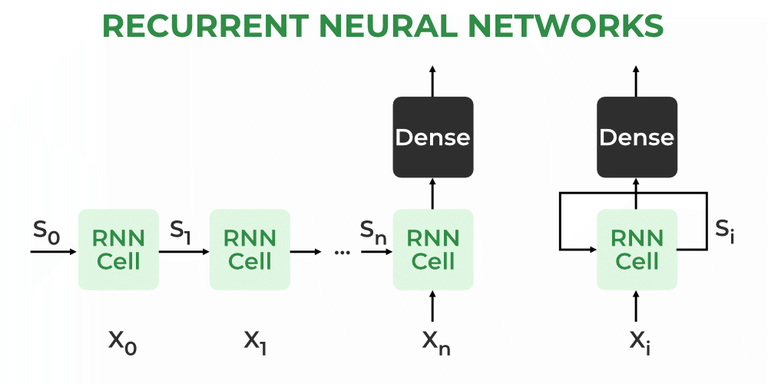

Как работает RNN?
На каждом временном шаге РНС обрабатывают блоки с фиксированной функцией активации. Эти единицы имеют внутреннее скрытое состояние, которое действует как память, сохраняющая информацию о предыдущих временных шагах. Эта память позволяет сети хранить прошлые знания и адаптироваться на основе новых входных данных.

- Обновление скрытого состояния в RNN

Текущее скрытое состояние $h_t$ зависит от предыдущего состояния $h_{t − 1}$
 и текущий ввод $x_t$ и вычисляется с использованием следующих соотношений:

1. **Обновление состояния**:



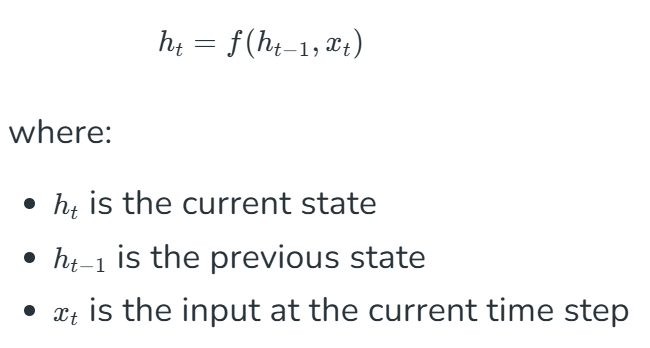

2. **Приложение функции активации:**


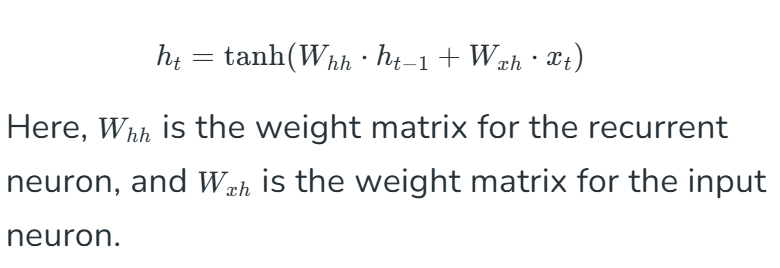

3. **Расчет выходных данных**:  

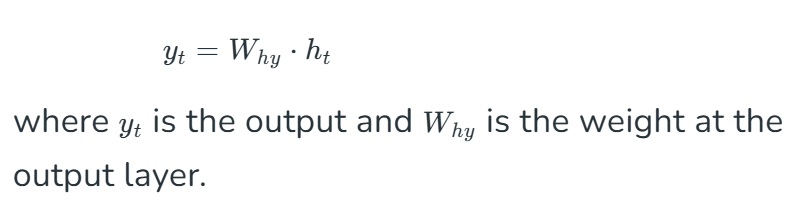

### Обратное распространение во времени (BPTT) в РНС  

Поскольку RNN обрабатывают последовательные данные, для обновления параметров сети используется функция обратного распространения во времени (BPTT). Функция потерь L(θ) зависит от конечного скрытого состояния $h_3$. И каждое скрытое состояние опирается на предыдущие, образуя последовательную цепочку зависимостей: $h_3$ зависит от $h_2$, $h_2$ зависит от $h_1$, ... , $h_1$ зависит от $h_0$.


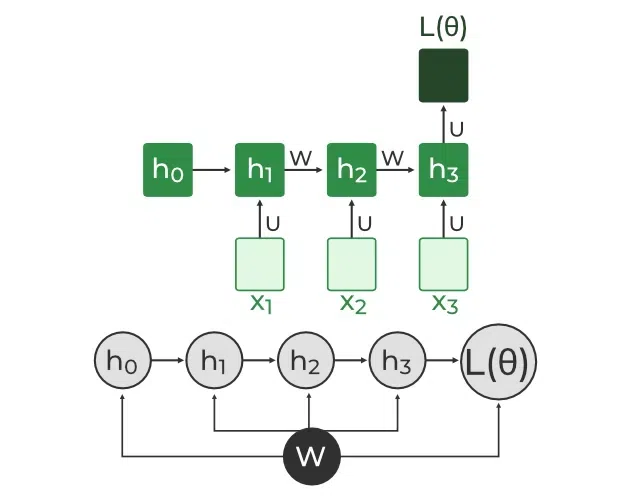

В BPTT градиенты распространяются в обратном направлении через каждый временной шаг. Это важно для обновления параметров сети на основе временных зависимостей.

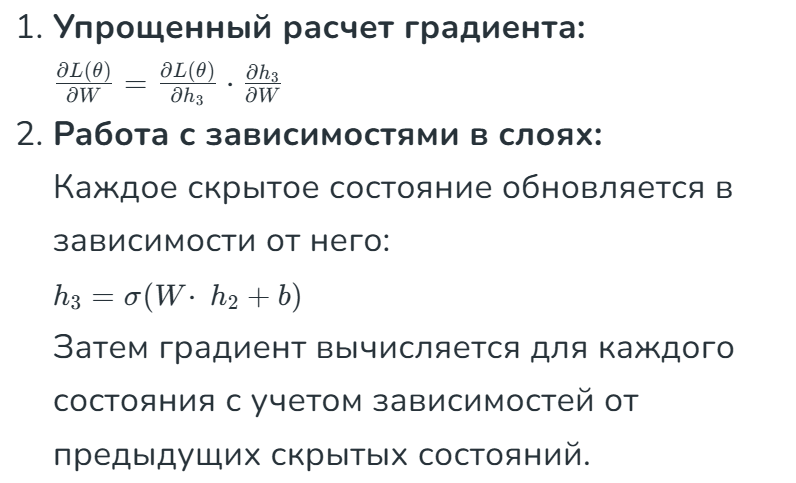

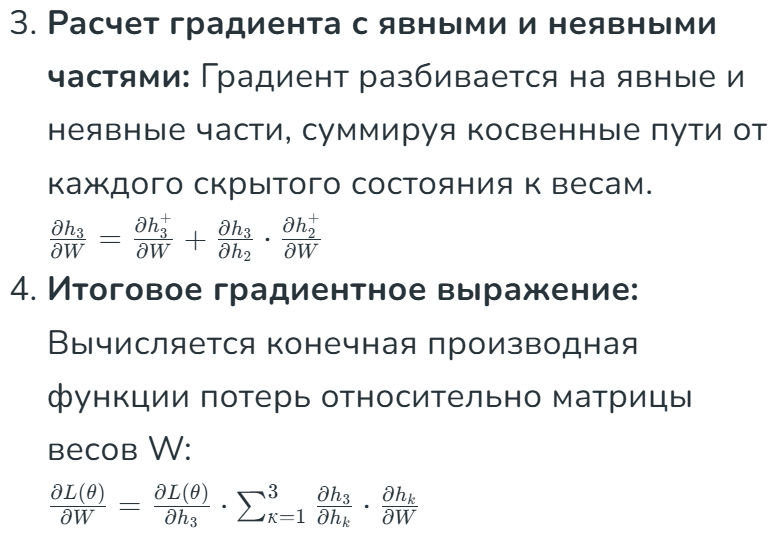

В этом итерационном процессе и заключается суть обратного распространения во времени.

## Типы рекуррентных нейронных сетей  

Существует четыре типа RNN в зависимости от количества входов и выходов в сети:

1. **РНС «один к одному»**

Это простейший тип архитектуры нейронной сети, где есть один вход и один выход. Он используется для простых задач классификации, таких как двоичная классификация, где не используются последовательные данные.

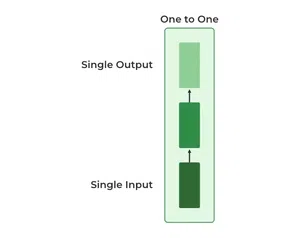

2. **RNN «один ко многим»**

В RNN типа «один ко многим» сеть обрабатывает один вход для создания нескольких выходных данных с течением времени. Это полезно в задачах, где один вход запускает последовательность прогнозов (выходов). Например, при создании подписей к изображениям одно изображение может быть использовано в качестве входных данных для создания последовательности слов в качестве подписи.

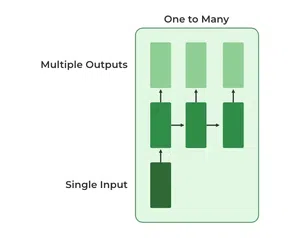

3. **РНС «многие-к-одному»**  

RNN типа "многие-к-одному" получает последовательность входов и генерирует один выходной сигнал. Этот тип полезен, когда для создания одного прогноза требуется общий контекст входной последовательности. При анализе тональности модель получает последовательность слов (например, предложение) и выдает один выходной результат, например положительный, отрицательный или нейтральный.

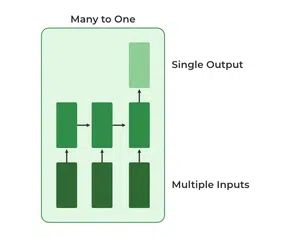

4. **РНС «многие-ко-многим»**  

Тип RNN "Многие-ко-многим" обрабатывает последовательность входных данных и генерирует последовательность выходных данных. В задаче языкового перевода последовательность слов на одном языке задается в качестве входных данных, а соответствующая последовательность на другом языке генерируется в качестве выходных данных.

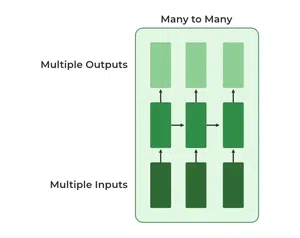

## Варианты рекуррентных нейронных сетей (РНС)
Существует несколько вариаций RNN, каждая из которых предназначена для решения конкретных задач или оптимизации для определенных задач:

1. **Vanilla RNN**  
Эта простейшая форма RNN состоит из одного скрытого слоя, в котором веса распределяются по временным шагам. Ванильные RNN подходят для обучения краткосрочным зависимостям, но ограничены проблемой исчезающего градиента, которая препятствует обучению длинных последовательностей.

2. **Bidirectional RNNs (Двунаправленная РНС)**  
Двунаправленные нейроны обрабатывают входные данные как в прямом, так и в обратном направлении, захватывая как прошлый, так и будущий контекст для каждого временного шага. Эта архитектура идеально подходит для задач, в которых доступна вся последовательность, таких как распознавание именованных сущностей и ответы на вопросы.

3. **Сети долговременной кратковременной памяти (LSTM) - Long Short-Term Memory Networks**
Сети долговременной памяти (LSTM) вводят механизм памяти для преодоления проблемы исчезающего градиента. Каждая ячейка LSTM имеет три входа (gate):

- Input Gate: Определяет, сколько новой информации должно быть добавлено к состоянию ячейки.

- Forget Gate: Решает, какую прошлую информацию следует отбросить.

- Output Gate: Определяет, какая информация должна быть выведена на текущем шаге. Эта селективная память позволяет LSTM обрабатывать долгосрочные зависимости, что делает их идеальными для задач, где более ранний контекст имеет решающее значение.

4. **Закрытые рекуррентные блоки - Gated Recurrent Units (GRUs)**
Рекуррентные блоки с стробированием (GRU) упрощают LSTM, объединяя входные и забывающие вентили в один вентиль обновления и оптимизируя механизм вывода. Эта конструкция эффективна с вычислительной точки зрения, часто работает аналогично LSTM и полезна в задачах, где простота и быстрое обучение полезны.

## Реализация генератора текста с помощью рекуррентных нейронных сетей

Мы создадим генератор текста на основе символов с использованием рекуррентной нейронной сети (RNN) в TensorFlow и Keras. Мы реализуем RNN, который обучается шаблонам из текстовой последовательности для генерации нового текста символ за символом.

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

Определим вводимый текст и подготовим набор символов

In [15]:
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

**Создание последовательностей и меток**  

Для обучения RNN нам нужны последовательности фиксированной длины () и символ, следующий за каждой последовательностью в качестве метки.seq_length

In [16]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)

Преобразование последовательностей и меток в one-hot кодирование

In [17]:
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

Построение модели RNN

In [18]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

Компиляция и обучение модели

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0729 - loss: 2.8595
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0764 - loss: 2.8618
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0625 - loss: 2.8286
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0625 - loss: 2.8062
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0764 - loss: 2.7957
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1354 - loss: 2.7706
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1458 - loss: 2.7595
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1701 - loss: 2.7286
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1528 - loss: 2.7265
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1528 - loss: 2.7009
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1736 - loss: 2.6844
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1910 - lo

Сгенерируем новый текст с помощью обученной модели

In [20]:
start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)

X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0382 - loss: 2.8778
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0521 - loss: 2.8553
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0868 - loss: 2.8332
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0972 - loss: 2.8010
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0868 - loss: 2.7804
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1250 - loss: 2.7610
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1389 - loss: 2.7478 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1493 - loss: 2.7263
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1979 - loss: 2.6959
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2500 - loss: 2.6910
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2361 - loss: 2.6631
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2188 - l

https://www.geeksforgeeks.org/recurrent-neural-networks-explanation/?ref=next_article

### TASK 1: Простая RNN для прогнозирования последовательности

Задача:
Создать однослойную RNN, которая предсказывает следующий элемент в последовательности чисел (например, [1, 2, 3] → 4).

Данные:

In [23]:
import numpy as np

X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
y = np.array([4, 5, 6, 7])  # следующий элемент

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Преобразование данных в 3D-формат (samples, timesteps, features)
X = X.reshape(...)

model = Sequential([...])

model.compile(...)
model.fit(X, y, epochs=100, verbose=0)

# Предсказание
test_input = np.array([5, 6, 7]).reshape((1, 3, 1))
print(model.predict(test_input))

## Преимущества рекуррентных нейронных сетей

- Последовательная память: РНС сохраняют информацию из предыдущих входных данных, что делает их идеальными для прогнозирования временных рядов, где прошлые данные имеют решающее значение. Эту способность часто называют **длинной кратковременной памятью (LSTM)**.

- Улучшенные пиксельные окрестности: RNN можно комбинировать со сверточными слоями для захвата расширенных пиксельных окрестностей, повышая производительность при обработке изображений и видеоданных.

## Ограничения рекуррентных нейронных сетей (РНС)
Несмотря на то, что РНС превосходно справляются с обработкой последовательных данных, они сталкиваются с двумя основными проблемами обучения, т. е. проблемой исчезающего градиента и проблемой взрывающегося градиента:

- **Исчезающий градиент**: Во время обратного распространения градиенты уменьшаются по мере прохождения каждого временного шага, что приводит к минимальным обновлениям веса. Это ограничивает способность RNN изучать долгосрочные зависимости, что имеет решающее значение для таких задач, как языковой перевод.

- **Взрывной градиент**: Иногда градиенты растут бесконтрольно, вызывая чрезмерно большие обновления веса, которые дестабилизируют тренировки.

Градиентная обрезка является распространенным методом решения этой проблемы.
Эти проблемы могут препятствовать выполнению стандартных RNN при выполнении сложных задач с длинной последовательностью.


## Применение рекуррентных нейронных сетей
РНС используются в различных приложениях, где данные являются последовательными или основаны на времени:

Прогнозирование временных рядов: РНС отлично справляются с задачами прогнозирования, такими как прогнозирование фондового рынка и прогнозирование погоды.
Обработка естественного языка (NLP): RNN играют основополагающую роль в задачах NLP, таких как моделирование языка, анализ тональности и машинный перевод.
Распознавание речи: RNN улавливают временные шаблоны в речевых данных, помогая в преобразовании речи в текст и других приложениях, связанных со звуком.
Обработка изображений и видео: в сочетании со сверточными слоями RNN помогают анализировать видеопоследовательности, выражения лица и распознавание жестов.



## Bidirectional Recurrent Neural Network

**Двунаправленная рекуррентная нейронная сеть (BRNN)** — это расширение традиционных RNN, предназначенное для обработки последовательных данных как в прямом, так и в обратном направлении. Это позволяет сети использовать как прошлый, так и будущий контекст при составлении прогнозов.

Он работает как обычный RNN, двигаясь в прямом направлении, обновляя скрытое состояние в зависимости от текущего ввода и предыдущего скрытого состояния на каждом временном шаге. Обратный скрытый слой, с другой стороны, анализирует входную последовательность противоположным образом, обновляя скрытое состояние на основе текущего ввода и скрытого состояния следующего временного шага.

По сравнению с обычными однонаправленными рекуррентными нейронными сетями, точность BRNN повышена, поскольку она может обрабатывать информацию в обоих направлениях и учитывать как прошлые, так и будущие контексты. Потому что два скрытых слоя могут дополнять друг друга, и прогнозы делаются на основе объединенных выходных данных двух скрытых слоев. Слои.

**Например**: Мне нравится яблоко. Оно очень полезно для здоровья.

Здесь, если мы использовали обычный RNN, мы можем запутаться, что мы имеем в виду: фрукт или компанию по 1-й линии. Но BRNN легко поймет свой контекст, поскольку он работает, двигаясь в обоих направлениях.

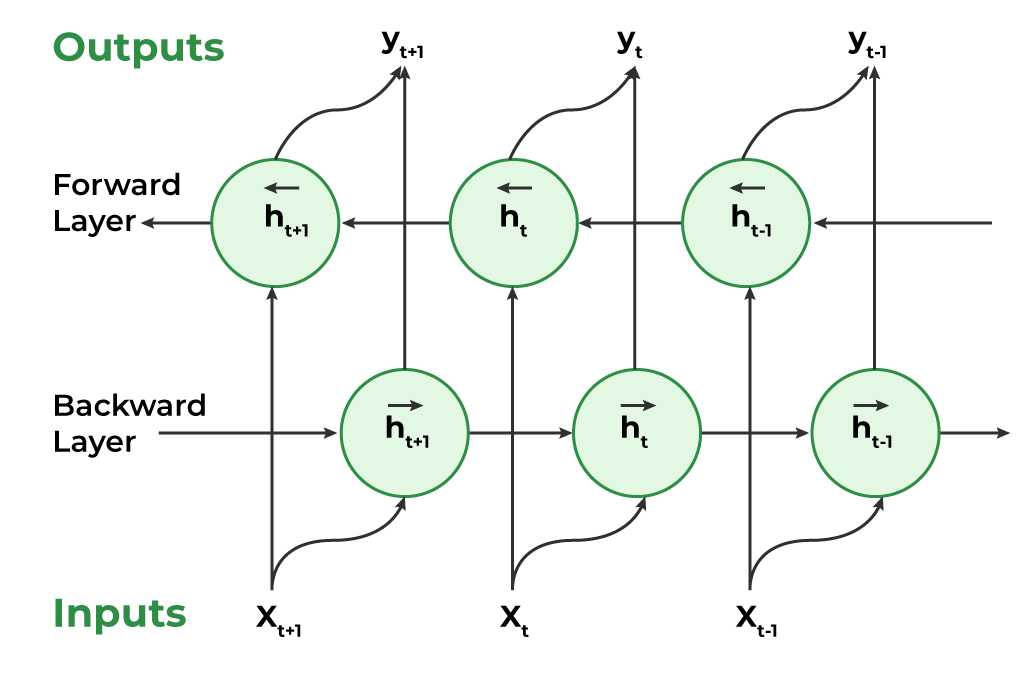

### Работа двунаправленной рекуррентной нейронной сети

- Ввод последовательности: последовательность точек данных, каждая из которых представлена в виде вектора с одинаковой размерностью, подается в BRNN. Последовательность может иметь разную длину.

- Двойная обработка: для обработки данных используются как прямое, так и обратное направления. Скрытое состояние на временном шаге t определяется следующим образом:
- - Прямое направление: Основано на входных данных на шаге t и скрытом состоянии на шаге t-1.
- - Обратное направление: Основано на входных данных на шаге t и скрытом состоянии на шаге t+1.

- Вычисление скрытого состояния: Нелинейная функция активации применяется к взвешенной сумме входных данных и предыдущего скрытого состояния. Это создает механизм памяти, который позволяет сети сохранять информацию, полученную на более ранних этапах.

- Определение выходных данных: Нелинейная функция активации применяется к взвешенной сумме скрытого состояния и выходных весов для вычисления выходных данных на каждом шаге. Эти выходные данные могут быть следующими:
- - Конечный результат работы сети.
- - Вход в другой слой для дальнейшей обработки.


### Применение двунаправленной рекуррентной нейронной сети
Bi-RNN применяются для решения различных задач обработки **естественного языка (NLP)**, в том числе:

- Анализ тональности: Принимая во внимание как предыдущий, так и последующий контекст, они могут быть использованы для категоризации тональности конкретного предложения.

- Распознавание именованных сущностей: Учитывая контекст, оно может быть использовано для идентификации сущностей в предложении.

- Машинный перевод: Его можно использовать в моделях кодировщика-декодера для машинного перевода, где декодер создает целевое предложение, а кодировщик анализирует исходное предложение в обоих направлениях, чтобы захватить его контекст.

- Распознавание речи: помогает более точно транскрибировать аудио, учитывая как прошлые, так и будущие элементы речи.

**Преимущества BRNN**
- Улучшенное понимание контекста: использует как прошлые, так и будущие данные для более точных прогнозов.

- Повышенная точность: Полезно в задачах NLP и обработки речи.

- Улучшенная работа с последовательностями переменной длины: более гибкая по сравнению со стандартными RNN.

- Повышенная надежность: может снизить уровень шума и нерелевантной информации благодаря прямой и обратной обработке.

**Проблемы BRNN**
- Высокая вычислительная стоимость: требует двойной обработки по сравнению с однонаправленными RNN.

- Более длительное время обучения: больше параметров для оптимизации, что замедляет сходимость.

- Ограниченная применимость в реальном времени: поскольку для прогнозирования требуется вся последовательность, они не идеальны для приложений реального времени, таких как распознавание речи в реальном времени.

- Меньшая интерпретируемость: Понимание того, почему был сделан прогноз, является более сложным, чем стандартная RNN.

### Реализация двунаправленной рекуррентной нейронной сети

Вот простая реализация двунаправленной RNN с использованием Keras и TensorFlow для анализа тональности в наборе данных IMDb, доступном в keras:

In [2]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Updated import

features = 2000
max_len = 50
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


**Определение архитектуры модели**  
Используя Keras, мы реализуем модель двунаправленной рекуррентной нейронной сети. Эта модель будет иметь 64 скрытых юнита и 128 в качестве размера закладного слоя. При составлении модели мы указываем следующие три основных параметра:

- оптимизатор – это метод, который помогает оптимизировать функцию стоимости с помощью градиентного спуска.
- loss – функция потерь, с помощью которой мы отслеживаем, улучшается ли модель с обучением или нет.
- метрики — это помогает оценить модель, прогнозируя данные для обучения и проверки.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding,\
    Bidirectional, SimpleRNN, Dense

embedding = 128
hidden = 64

model = Sequential()
model.add(Embedding(features, embedding,
                    input_length=max_len))
model.add(Bidirectional(SimpleRNN(hidden)))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', 'binary_crossentropy',
              metrics=['accuracy'])


**Обучение модели**  

Поскольку мы успешно скомпилировали нашу модель и конвейер данных также готов, мы можем двигаться вперед к процессу обучения нашего BRNN.

In [4]:
batch_size = 32
epochs = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.5960 - loss: 0.6459 - val_accuracy: 0.7870 - val_loss: 0.4568
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.8100 - loss: 0.4168 - val_accuracy: 0.7823 - val_loss: 0.4689
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.8646 - loss: 0.3274 - val_accuracy: 0.7609 - val_loss: 0.5104
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.9174 - loss: 0.2209 - val_accuracy: 0.7624 - val_loss: 0.6011
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9507 - loss: 0.1350 - val_accuracy: 0.7152 - val_loss: 0.8076


In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7097 - loss: 0.8204
Test accuracy: 0.7151600122451782


## LSTM – Long Short Term Memory  

Long Short-Term Memory (LSTM) — это усовершенствованная версия рекуррентной нейронной сети (RNN), разработанная Hochreiter & Schmidhuber. LSTM могут фиксировать долгосрочные зависимости в последовательных данных, что делает их идеальными для таких задач, как перевод с разных языков, распознавание речи и прогнозирование временных рядов.

В отличие от традиционных РНС, которые используют одно скрытое состояние, проходящее через время, LSTM вводят ячейку памяти, которая хранит информацию в течение длительных периодов времени, решая проблему обучения долгосрочным зависимостям.

**Проблема с долгосрочными зависимостями в RNN**  

Рекуррентные нейронные сети (RNN) предназначены для обработки последовательных данных путем поддержания скрытого состояния, которое захватывает информацию из предыдущих временных шагов. Тем не менее, они часто сталкиваются с проблемами при изучении долгосрочных зависимостей, где информация с отдаленных временных этапов становится решающей для составления точных прогнозов текущего состояния. Эта задача известна как проблема исчезающего градиента или взрывающегося градиента.

* **Исчезающий градиент**: При обучении модели с течением времени градиенты (которые помогают модели обучаться) могут уменьшаться при прохождении многих этапов. Это затрудняет для модели изучение долгосрочных закономерностей, поскольку более ранняя информация становится практически неактуальной.

* **Взрывной градиент**: Иногда градиенты могут становиться слишком большими, вызывая нестабильность. Это затрудняет правильное обучение модели, так как обновления модели становятся беспорядочными и непредсказуемыми.
Обе эти проблемы затрудняют для стандартных RNN эффективный захват долгосрочных зависимостей в последовательных данных.


### Архитектура LSTM
Архитектура LSTM включает в себя ячейку памяти, которая управляется тремя вентилями: входным вентилем, забытым и выходным. Эти вентили решают, какую информацию добавлять, удалять из ячейки памяти и выводить из нее.

* Input gate: Контролирует, какая информация добавляется в ячейку памяти.
* Forget gate: Определяет, какая информация удаляется из ячейки памяти.
* Output gate: Контролирует, какая информация выводится из ячейки памяти.

Это позволяет сетям LSTM выборочно сохранять или отбрасывать информацию при ее прохождении по сети, что позволяет им изучать долгосрочные зависимости. Сеть имеет скрытое состояние, которое подобно ее кратковременной памяти. Эта память обновляется с использованием текущего ввода, предыдущего скрытого состояния и текущего состояния ячейки памяти.

**Работа ЛСТМ**  

Архитектура LSTM имеет цепную структуру, которая содержит четыре нейронные сети и различные блоки памяти, называемые **ячейками**.

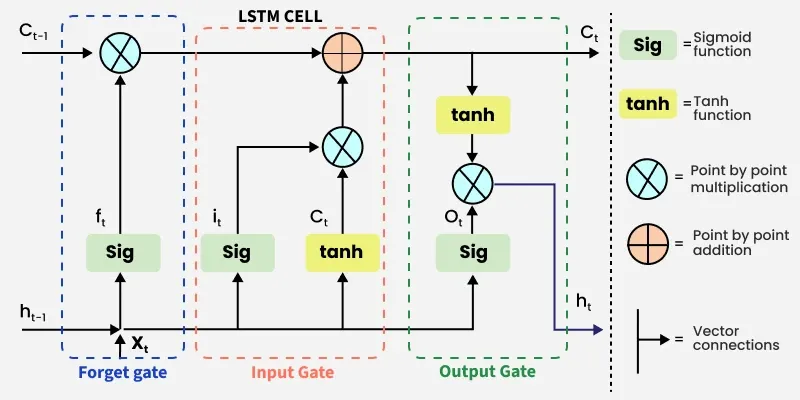

Информация сохраняется клетками, а манипуляции с памятью выполняются вентилями. Есть три gates –  

1) **Forget Gate**  
Информация, которая больше не нужна в состоянии ячейки, удаляется с помощью элемента забывания. Два входа $x_t$ (ввод в определенный момент времени) и $h_{t-1}$ (выход предыдущей ячейки) подаются в затвор и умножаются на весовые матрицы с последующим добавлением смещения. Результирующая передается через функцию активации, которая выдает двоичный вывод. Если для определенного состояния ячейки выход равен 0, часть информации забыта, а для выхода 1 информация сохраняется для использования в будущем.

Уравнение для Forget Gate выглядит следующим образом:

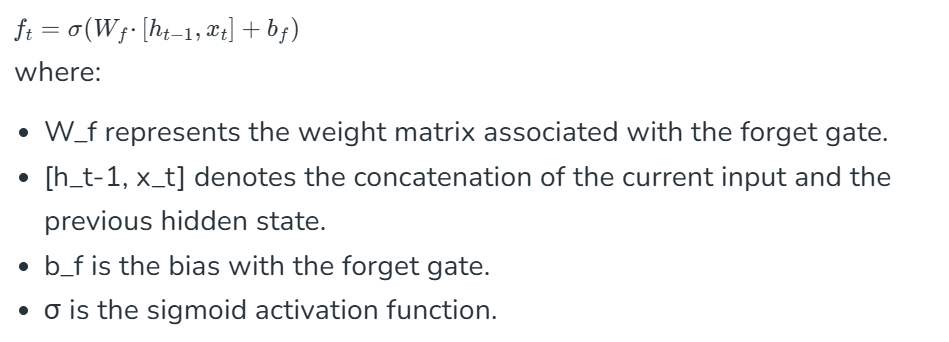

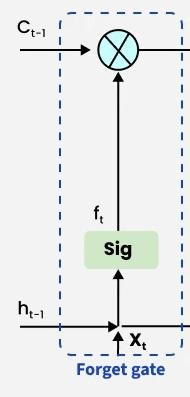

2) **Input gate**  
Добавление полезной информации к состоянию ячейки осуществляется входным вентилем. Во-первых, информация регулируется с помощью сигмоидальной функции и фильтруется значения, которые должны быть запомнены, аналогично вентильному блоку «забыть» с помощью входов $h_{t-1}$ и $х_t$.Затем с помощью функции $tanh$ создается вектор, который дает выход от -1 до +1, который содержит все возможные значения от $h_{t-1}$ и $х_t$. Наконец, значения вектора и регулируемые значения перемножаются для получения полезной информации. Уравнение для входного вентиля выглядит следующим образом:

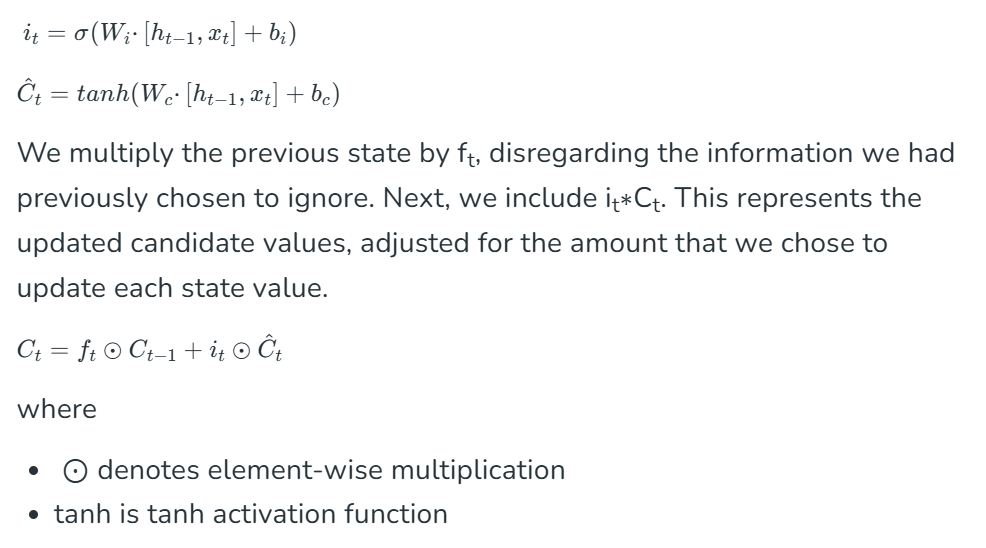

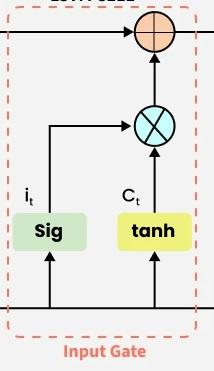

3) **Output gate**  

Задача извлечения полезной информации из текущего состояния ячейки, которая будет представлена в качестве выходных данных, выполняется выходным вентилем. Во-первых, вектор генерируется путем применения функции tanh к ячейке. Затем информация регулируется с помощью сигмоидальной функции и фильтруется по значениям, которые должны быть запомнены с помощью входных данных
$h_{t−1}$ и $x_t$. Наконец, значения вектора и регулируемые значения умножаются для отправки в качестве выходных и входных данных в следующую ячейку. Уравнение для выходного затвора выглядит следующим образом:

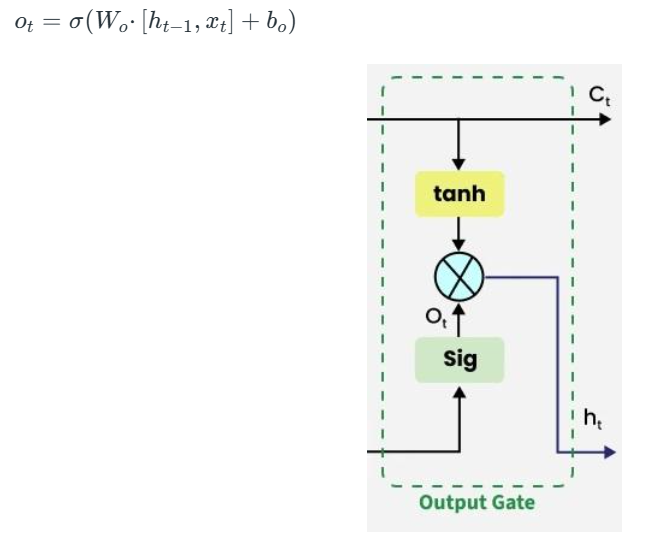

https://www.geeksforgeeks.org/lstm-derivation-of-back-propagation-through-time/

## Bidirectional LSTM in NLP  
**Долгосрочная память (LSTM)** — это тип нейронной сети, предназначенный для работы с долгосрочными зависимостями и преодоления проблемы исчезающего градиента RNN. Он использует ячейку памяти вместе с вентильными элементами ввода, забытия и вывода для выборочного сохранения или отбрасывания информации.

**Двунаправленная долгосрочная память (BiLSTM)** является расширением традиционной сети LSTM (Long Short-Term Memory). В отличие от обычных LSTM, которые обрабатывают последовательности только в одном направлении, BiLSTM позволяют информации течь как в прямом, так и в обратном направлении, что позволяет им захватывать более богатую контекстуальную информацию. Это делает BiLSTM особенно эффективными для задач, где понимание как прошлого, так и будущего контекста имеет решающее значение. В этой статье мы узнаем о них больше и реализуем модель анализа тональности с помощью BiLSTM в TensorFlow.

**Общие сведения о двунаправленном LSTM (BiLSTM)**  

Двунаправленный LSTM (BiLSTM) состоит из двух отдельных слоев LSTM:

- Forward LSTM: обрабатывает последовательность от начала до конца
- Backward LSTM: обрабатывает последовательность от конца до начала

Выходы обоих LSTM затем объединяются для формирования конечного выхода. Математически конечный результат в момент времени t вычисляется следующим образом:
$p_t$ = $p_{t{_f}}$ + $p_{t{_b}}$


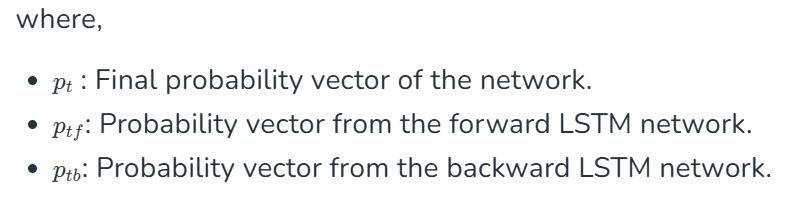

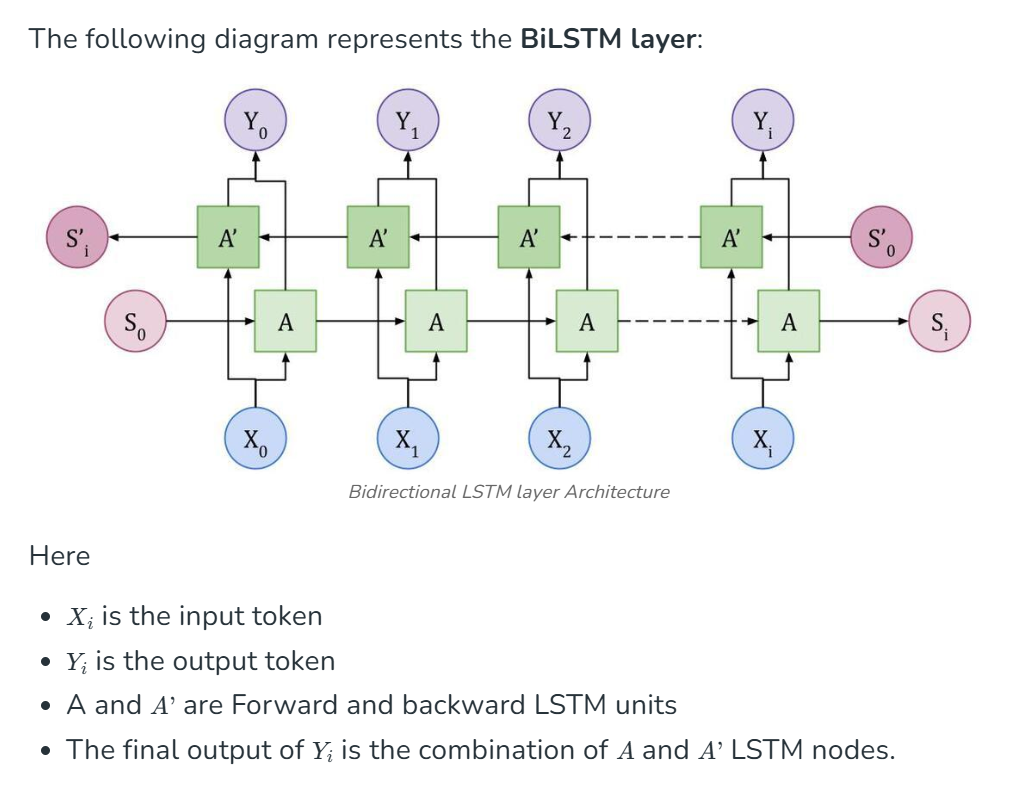

### Реализация: анализ тональности с помощью BiLSTM
Теперь рассмотрим реализацию системы рецензирования с использованием слоев BiLSTM в Python с использованием Tensorflow. Мы будем проводить анализ настроений на наборе данных обзоров фильмов IMDB. Мы бы внедрили сеть с нуля и обучили ее определять, является ли отзыв положительным или отрицательным.

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

Мы загрузили датасет IMDB от tenserflow, который содержит 25 000 помеченных обзоров фильмов для обучения и тестирования.
Перетасовка гарантирует, что модель не заучится шаблонам на основе порядка отзывов.

In [7]:
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 32

train_dataset = train_dataset.shuffle(10000).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7LZ87G_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7LZ87G_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7LZ87G_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [8]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])

Text:
 b"I don't think I'll ever understand the hate for Renny Harlin. 'Die Hard 2' was cool, and he gave the world 'Cliffhanger', one of the most awesome action movies ever. That's right, you little punks, 'Cliffhanger' rules, and we all know it.<br /><br />Sly plays Gabe Walker, a former rescue climber who is 'just visiting' his old town when he is asked to help a former friend, Hal Tucker (Michael Rooker), assist in a rescue on a mountain peak. Walker obviously came back at a convenient time, because the stranded people are actually a sophisticated team of thieves led by Eric Qualen (John Lithgow). Qualen & co. have lost a whole lot of money they stole from the U.S. government somewhere in the Rocky Mountains and they really would like it back...<br /><br />Essentially, 'Cliffhanger' is another 'Die Hard' clone. Just trade in the confines of Nakatomi Plaza to the open mountain ranges of the Rocky Mountains, complete with scenes created to point out the weaknesses of our hero and kee

**Векторизация текста**  

Сначала мы выполним векторизацию текста и позволим кодировщику сопоставить все слова в обучающем наборе данных с токеном. В приведенном ниже примере мы также можем увидеть, как мы можем закодировать и декодировать образец обзора в вектор целых чисел.

* vectorize_layer : токенизирует и нормализует текст.
* Он преобразует слова в числовые значения, чтобы нейронная сеть могла легко их обрабатывать.

In [9]:
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=100)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))

**Архитектура модели (слои BiLSTM)**  

В этом разделе мы определим модель для анализа тональности. Первый слой Векторизация текста кодирует входной текст в индексы токенов. Эти лексемы пропускаются через слой встраивания, который сопоставляет слова с обучаемыми векторами. При обучении эти векторы корректируются таким образом, что слова с похожими значениями имеют схожие представления. Затем двунаправленные слои LSTM обрабатывают эти последовательности для создания осмысленных представлений, которые преобразуются для классификации.

- Встраиваемый слой: преобразует слова в обучаемые векторы слов.

- Двунаправленный LSTM (64 единицы): Первый слой обрабатывает в обоих направлениях.

- Двунаправленный LSTM (32 единицы): Второй слой уточняет изученные шаблоны.

- Плотные слои: Полностью связанные слои для классификации.

- Конечный результат: выход одного нейрона для классификации настроений.

In [10]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Обучение модели**  

Теперь мы будем обучать модель, которую мы определили на предыдущем шаге, на протяжении пяти эпох.

In [11]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 288s 353ms/step - accuracy: 0.6932 - loss: 0.5251 - val_accuracy: 0.8208 - val_loss: 0.4134
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 272s 348ms/step - accuracy: 0.9196 - loss: 0.2034 - val_accuracy: 0.7750 - val_loss: 0.5094
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 354ms/step - accuracy: 0.9710 - loss: 0.0808 - val_accuracy: 0.7776 - val_loss: 0.7260
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 398ms/step - accuracy: 0.9893 - loss: 0.0300 - val_accuracy: 0.7808 - val_loss: 0.9709
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 267s 341ms/step - accuracy: 0.9921 - loss: 0.0227 - val_accuracy: 0.7822 - val_loss: 1.2068


Построение графиков зависимости обучения от точности проверки и обучения от потерь при валидации.

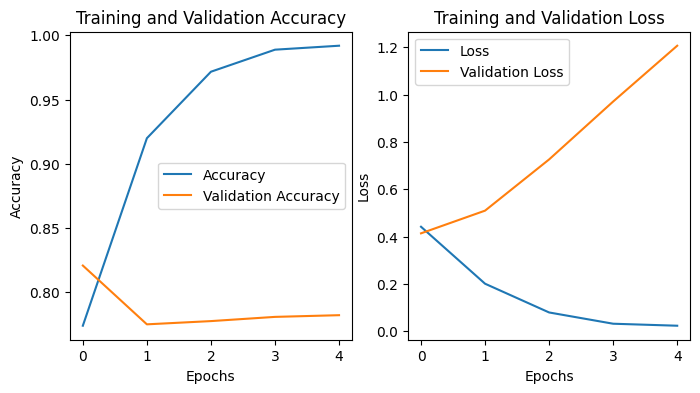

In [12]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

Модель хорошо обучается на обучающих данных, достигая точности 98 %, но испытывает трудности с проверочными данными, оставаясь на уровне 86 %. Растущие потери при проверке указывают на переобучение, то есть модель запоминает обучающие данные, но плохо обобщает. Чтобы исправить это, мы можем использовать Dropout, регуляризацию L2, раннюю остановку или упрощение модели для улучшения реальной производительности.

### TASK 2: Прогнозирование временных рядов

**Задача**:
Спрогнозировать временной ряд (например, цену акций) с помощью LSTM.

In [35]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Генерация синтетических данных
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31")
close_prices = np.cumsum(np.random.randn(len(dates))) * 10 + 100  # Имитация цен

# Создаем DataFrame
data = pd.DataFrame({
    "Date": dates,
    "Open": close_prices + np.random.randn(len(dates)) * 2,
    "High": close_prices + np.random.randn(len(dates)) * 1.5 + 1,
    "Low": close_prices - np.random.randn(len(dates)) * 1.5 - 1,
    "Close": close_prices,
    "Volume": np.random.randint(1000000, 5000000, len(dates))
})

# Сохраняем в CSV
data.to_csv("stock_prices.csv", index=False)
print("Файл 'stock_prices.csv' создан!")

Файл 'stock_prices.csv' создан!


In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Embedding, LSTM, Dense

data = pd.read_csv('stock_prices.csv')  # Датафрейм с колонкой 'Close'
scaler = MinMaxScaler()
data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model = Sequential([...])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32)

In [ ]:
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
plt.plot(y_test, label='Real')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

## Gated Recurrent Unit Networks

Однако LSTM имеют очень сложную структуру с более высокими вычислительными затратами. Для преодоления этого был введен Gated Recurrent Unit (GRU), который использует архитектуру LSTM путем объединения своих стробирующих механизмов, предлагая более эффективное решение для многих последовательных задач без ущерба для производительности.

Начало работы с закрытыми рекуррентными блоками (GRU)
Gated Recurrent Unit (GRU) — это тип РНС, представленный Cho et al. в 2014 году. Основная идея GRU заключается в использовании механизмов стробирования для выборочного обновления скрытого состояния на каждом временном шаге, что позволяет им запоминать важную информацию, отбрасывая ненужные детали. GRU стремятся упростить архитектуру LSTM за счет слияния некоторых ее компонентов и сосредоточения внимания только на двух основных шлюзах: update gate и reset gate.



### Основная структура ГРУ  




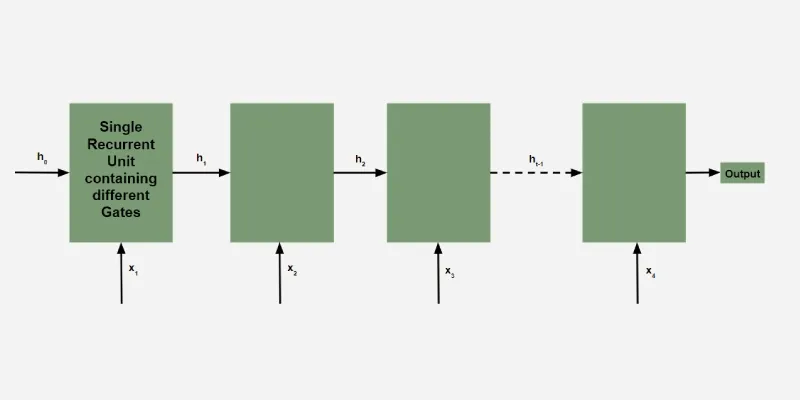

ГРУ состоит из двух основных ворот:

- update gate ($z_t$): Этот вентиль определяет, сколько информации из предыдущего скрытого состояния должно быть сохранено для следующего временного шага.

- reset gate ($r_t$): Этот вентиль определяет, какая часть прошлого скрытого состояния должна быть забыта.

Эти шлюзы позволяют ГРУ более эффективно контролировать поток информации по сравнению с традиционными RNN, которые полагаются исключительно на скрытое состояние.

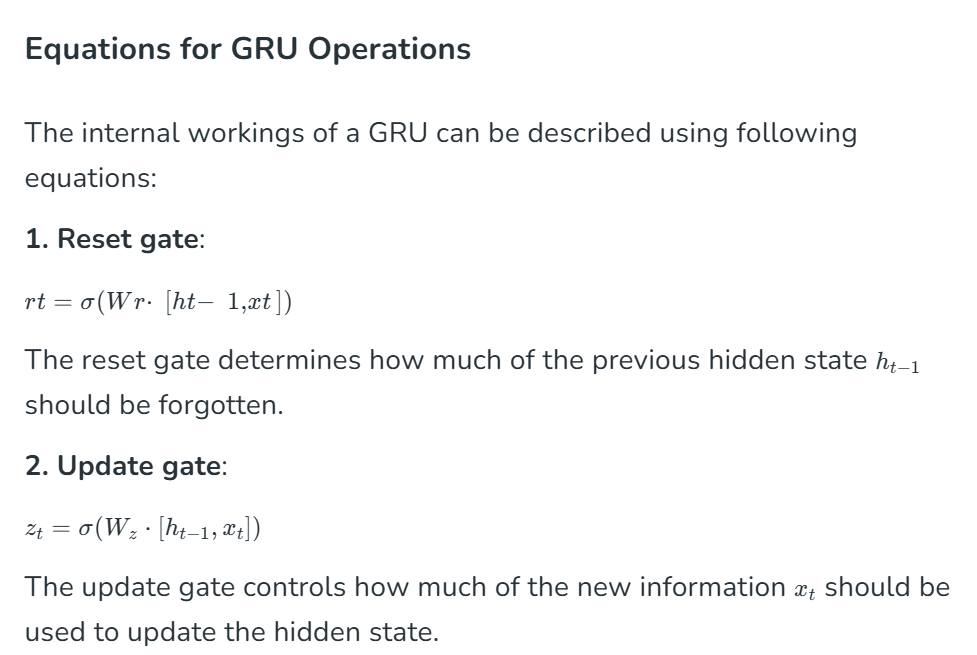

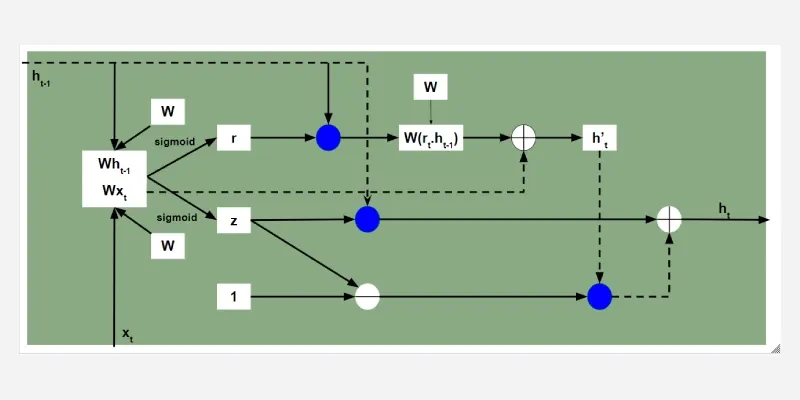

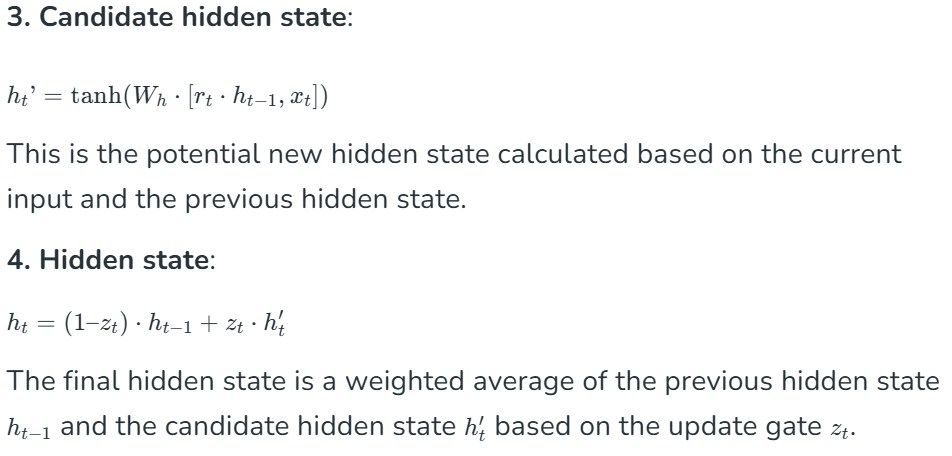

### Как GRU решают проблему исчезающего градиента  

Как и LSTM, GRU были разработаны для решения проблемы исчезающего градиента, которая часто встречается в традиционных RNN. GRU помогают смягчить эту проблему, используя вентили, которые регулируют поток градиентов во время обучения, гарантируя, что важная информация сохраняется и что градиенты не уменьшаются чрезмерно с течением времени. Используя эти шлюзы, ГРУ поддерживают баланс между запоминанием важной прошлой информации и изучением новых, актуальных данных.

**GRU против LSTM**  

GRU более эффективны с точки зрения вычислений, поскольку они объединяют вентили «забыть» и «ввод» в один шлюз обновления. GRU не поддерживают внутреннее состояние ячейки, как это делают LSTM, вместо этого они хранят информацию непосредственно в скрытом состоянии, что делает их проще и быстрее.

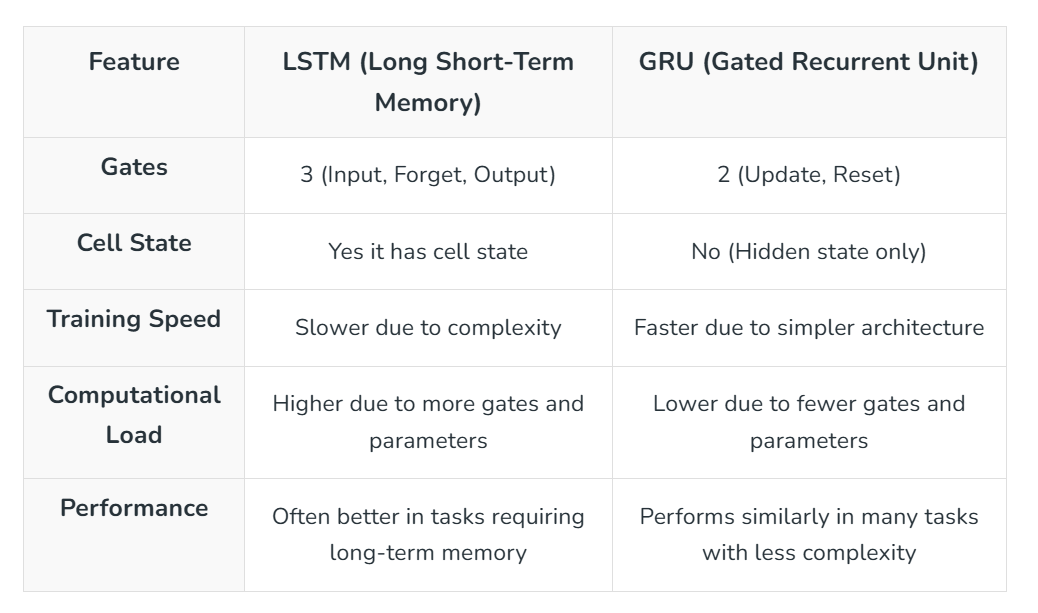

### Реализация на Python

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

Набор данных представляет собой набор данных временных рядов, содержащий ежедневные данные о температуре, т.е. набор данных прогноза. Он охватывает 8 000 дней, начиная с 1 января 2010 года.

In [15]:
df = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')
print(df.head())

            Temperature
Date                   
2010-01-01    27.483571
2010-01-02    24.308678
2010-01-03    28.238443
2010-01-04    32.615149
2010-01-05    23.829233


Предварительная обработка данных

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

MinMaxScaler(): Масштабирует данные в диапазоне от 0 до 1. Это важно, потому что нейронные сети работают лучше при правильном масштабировании входных функций.

In [17]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

- create_dataset(): подготавливает набор данных для прогнозирования временных рядов. Он создает скользящие окна длины для прогнозирования следующего временного шага.time_step

- X.reshape(): Изменяет форму входных данных в соответствии с ожидаемой формой для ГРУ, которая является 3D: .[samples, time steps, features]

In [18]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

- GRU(units=50): Добавляет слой GRU с 50 единицами (нейронами).

- return_sequences=True: Гарантирует, что слой GRU возвращает всю последовательность (требуется для наложения нескольких слоев GRU).

- Dense(units=1): Выходной слой, который прогнозирует одно значение для следующего временного шага.

- Adam(): Адаптивный оптимизатор, обычно используемый в глубоком обучении.

In [19]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - loss: 0.0332
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - loss: 0.0182
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: 0.0177
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - loss: 0.0178
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 44s 126ms/step - loss: 0.0178
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - loss: 0.0176
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 47s 138ms/step - loss: 0.0181
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - loss: 0.0174
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - loss: 0.0174
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - loss: 0.0175


In [21]:
input_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)
predicted_values = model.predict(input_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


- Входная последовательность: Код принимает последние 100 значений температуры из набора данных () в качестве входной последовательности.scaled_data[-time_step:]

- Изменение формы входной последовательности: Входная последовательность преобразуется в форму, потому что модель GRU ожидает 3D-вход: . Здесь потому, что мы делаем одно предсказание (длину входной последовательности) и потому что мы прогнозируем только значение температуры.(1, time_step, 1)[samples,
time_steps, features]samples=1time_steps=100features=1

- model.predict(): Использует обученную модель для прогнозирования будущих значений на основе входных данных.

**Обратное преобразование прогнозов**  

Обратное преобразование прогнозов относится к процессу преобразования масштабированных (нормализованных) прогнозов обратно в исходный масштаб.

In [22]:
predicted_values = scaler.inverse_transform(predicted_values)
print(f"The predicted temperature for the next day is: {predicted_values[0][0]:.2f}°C")

The predicted temperature for the next day is: 24.79°C


Выходные 24,79°C — это прогноз модели GRU для температуры следующего дня на основе данных за последние 100 дней. Модель использует исторические закономерности для прогнозирования будущих значений и преобразует прогноз обратно в исходную температурную шкалу.



### TASK 3: Генерация текста с помощью GRU

**Задача**:  
Написать модель на основе GRU, которая генерирует текст по заданному начальному символу.

Данные:

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import tensorflow as tf

# Данные
text = "hello world" * 100
chars = sorted(set(text))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for c, i in char_to_int.items()}


In [33]:
# Подготовка последовательностей
seq_length = 10
X = []
y = []
for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1))
X = X / float(len(chars))
y = tf.keras.utils.to_categorical(y)  # Форма (samples, num_chars)

# Модель
model = Sequential([...])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0345
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9563
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.8894
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.3824
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.7417
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3308
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1353
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0320
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0145
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0088
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0069
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoc

In [ ]:
import numpy as np

def generate_text(model, seed_text, num_chars_to_generate, char_to_int, int_to_char, seq_length):
    generated_text = seed_text
    for _ in range(num_chars_to_generate):
        # Преобразуем seed в числовой формат
        ...

        # Предсказываем следующий символ
        ...

        # Добавляем символ к seed
        generated_text += predicted_char
        seed_text += predicted_char  # Обновляем seed для следующей итерации

    return generated_text

# Параметры генерации
seed = "hello worl"  # Должен быть такой же длины, как seq_length (10)
num_chars = 50

# Генерируем текст
generated = generate_text(model, seed, num_chars, char_to_int, int_to_char, seq_length)
print(generated)

Генерация текста с использованием GRU: https://www.geeksforgeeks.org/ml-text-generation-using-gated-recurrent-unit-networks/

## Vanishing and Exploding Gradients Problems

https://www.geeksforgeeks.org/vanishing-and-exploding-gradients-problems-in-deep-learning/